# Content

[GAN](#GAN)

[DCGAN](#DCGAN)

# GAN

[post](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/)

[notebook](https://github.com/nttuan8/GAN_Tutorial/blob/master/G1/GAN-MNIST.ipynb)

![img](process.png)

![img](ideal.png)

In [51]:
# example of loading he mnist dataset
from keras.datasets.mnist import load_data

# load the images into memory
(X_train,y_train),(X_test,y_test) = load_data()

# summarize the shape of the dataset
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)
y_train (60000,)
y_test (10000,)


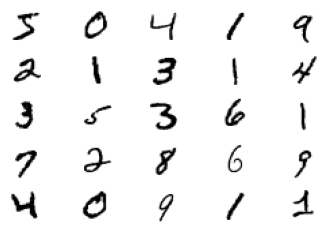

In [117]:
# display samples
import matplotlib.pyplot as plt

def display_samples(X):
    # plot images from the training dataset
    m = 5
    for i in range(m*m):
        # define subplot
        plt.subplot(m,m,1+i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(X[i],cmap='gray_r')
    # display
    plt.show()
    
display_samples(X_train)

In [140]:
# import the libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D,Flatten,Dropout,LeakyReLU,Conv2DTranspose,Reshape

Discriminator

![discrminator](discriminator.png)

In [72]:
def define_discriminator(in_shape=(28,28,1)):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

In [74]:
# define discriminator
discriminator = define_discriminator()
# summarize the model
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)            

In [127]:
def load_real_samples(X):
    # expand to 3f add e.g. add channels dimension
    X = np.expand_dims(X,-1)
    # convert from usigned ints to floats
    X = X.astype('float32')
    # normalize scale from [0,255] to [0,1]
    X = X/255.0
    return X

In [128]:
X = load_real_samples(X_train)
print("X",X.shape)

X (60000, 28, 28, 1)


In [109]:
# generate real samples
def generate_real_samples(dataset,n_samples):
    # choice random instances
    ix = np.random.randint(0,dataset.shape[0],n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate real class labels 1
    y = np.ones((n_samples,1))
    return X,y

In [168]:
# generate fake samples
def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = np.random.rand(28*28*n_samples)
    # reshape into a batch of grayscale images
    X = X.reshape((n_samples,28,28,1))
    # generate fake class labels 0
    y = np.zeros((n_samples,1))
    return X,y

(100, 28, 28)
(100, 1)


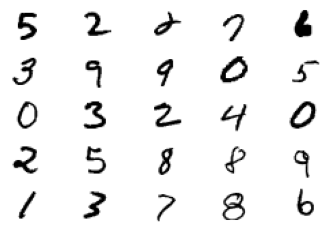

In [166]:
X,y = generate_real_samples(X_train,100)
print(X.shape)
print(y.shape)
display_samples(X)

(100, 28, 28, 1)
(100, 1)


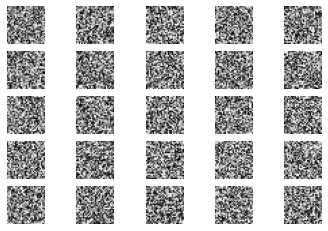

In [169]:
X,y = generate_fake_samples(100)
print(X.shape)
print(y.shape)
display_samples(X)

In [170]:
from tqdm import tqdm

# train the discriminator model
def train_discriminator(model,dataset,n_inter=100,n_batch=128):
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in tqdm(range(n_inter)):
        # get randomly seletected real samples
        X_real,y_real = generate_real_samples(dataset,half_batch)
        # update discriminator on real samples
        _,real_acc = model.train_on_batch(X_real,y_real)
        # generate fake  examples
        X_fake,y_fake = generate_fake_samples(half_batch)
        # update discriminator on fake samples
        _,fake_acc = model.train_on_batch(X_fake,y_fake)
        # summarize performance
        print('%d real=%.0f%% fake=%0f%%' % (i+1,real_acc*100,fake_acc*100))

In [171]:
# load the images into memory
(X_train,y_train),(X_test,y_test) = load_data()
# define the discrimator model
model = define_discriminator()
# load image data
dataset = load_real_samples(X_train)
# fit the model
train_discriminator(model,dataset,n_inter=10,n_batch=128)

 20%|██        | 2/10 [00:00<00:02,  3.23it/s]

1 real=75% fake=43.750000%
2 real=75% fake=62.500000%


 40%|████      | 4/10 [00:00<00:01,  5.44it/s]

3 real=75% fake=70.312500%
4 real=81% fake=84.375000%


 60%|██████    | 6/10 [00:01<00:00,  6.74it/s]

5 real=66% fake=87.500000%
6 real=78% fake=100.000000%


 80%|████████  | 8/10 [00:01<00:00,  7.27it/s]

7 real=80% fake=100.000000%
8 real=70% fake=100.000000%


100%|██████████| 10/10 [00:01<00:00,  5.87it/s]

9 real=83% fake=100.000000%
10 real=77% fake=100.000000%


Generator

![Generator](generator.png)

In [172]:
# define the standalone generator model
def define_generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 128*7*7
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    # upsample to 14x14
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
    return model

In [173]:
# size of latent space
latent_dim=100
generator = define_generator(latent_dim)
generator.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 28, 28, 128)     

In [174]:
# generate points in latent space as input for generator
def generate_latent_points(latent_dim,n_samples):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim*n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples,latent_dim)
    return x_input

In [175]:
x = generate_latent_points(100,25)
print(x.shape)

(25, 100)


In [176]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model,latent_dim,n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim,n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create fake class labels 0
    y = np.zeros((n_samples,1))
    return X,y

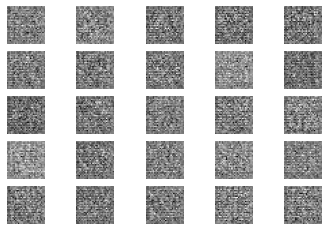

In [178]:
latent_dim = 100 # size of the latent space
n_samples = 25 # generate samples
# define generator
generator = define_generator(latent_dim)
X,_ = generate_fake_samples(generator,latent_dim,n_samples)
display_samples(X)

In [181]:
# define the combined generator and discriminator model for updating the generator
def define_gan(g_model,d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add discriminator
    model.add(d_model)
    # compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model

In [183]:
# size of the latent space
latent_dim = 100
# create discriminator
d_model = define_discriminator()
# create generator
g_model = define_generator(latent_dim)
# create gan
gan_model = define_gan(g_model,d_model)
# summarize gan model
gan_model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_33 (Sequential)   (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_32 (Sequential)   (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


In [201]:
# train the generator and discriminator
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=100,n_batch=128):
    bat_per_epo = int(dataset.shape[0]/n_batch)
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in tqdm(range(n_epochs)):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected real sample
            X_real,y_real = generate_real_samples(dataset,half_batch)
            # generate fake samples
            X_fake,y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
            # create training set for the discriminator
            X,y = np.vstack((X_real,X_fake)),np.vstack((y_real,y_fake))
            # update discriminator model weights
            d_loss,_ = d_model.train_on_batch(X,y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim,n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch,1))
            # update the generator via the discriminator error
            g_loss = gan_model.train_on_batch(X_gan,y_gan)
            # summarize loss on this batch
            if j %100==0:
                print('>%d,%d/%d, d=%.3f, g=%.3f' % (i+1,j+1,bat_per_epo,d_loss,g_loss))

In [203]:
#evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=100):
    #prepare real samples
    X_real,y_real = generate_real_samples(dataset,n_samples)
    # evaluate discriminator on real examples
    _,acc_real = d_model.evaluate(X_real,y_real,verbose=0)
    # prepare fake examples
    X_fake,y_fake = generate_fake_samples(g_model,latent_dim,n_samples)
    # evaluate discriminator on fake examples
    _,acc_fake = d_model.evaluate(x_fake,y_fake,verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # save plot
    save_plot(x_fake,epoch)
    # save the generator model title file
    filename = 'generator_model_%03d.h5' % (epoch + 1)
    g_model.save(filename)

In [204]:
# load and prepare mnist training images
def load_real_samples():
    # load mnist dataset
    (trainX, _), (_, _) = load_data()
    # expand to 3d, e.g. add channels dimension
    X = np.expand_dims(trainX, axis=-1)
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [0,1]
    X = X / 255.0
    return X

Train GAN

In [205]:
#size of latent space
latent_dim=100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model,d_model)
# load image data
dataset - load_real_samples()
# train model
train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=2,n_batch=128)

  0%|          | 0/2 [00:00<?, ?it/s]

>1,1/468, d=0.721, g=0.651
>1,101/468, d=0.081, g=2.362
>1,201/468, d=0.528, g=0.949
>1,301/468, d=1.009, g=0.592
>1,401/468, d=0.754, g=0.655


 50%|█████     | 1/2 [40:59<40:59, 2459.24s/it]

>2,1/468, d=0.673, g=0.689
>2,101/468, d=0.651, g=0.721
>2,201/468, d=0.716, g=0.739
>2,301/468, d=0.718, g=0.718
>2,401/468, d=0.711, g=0.754


100%|██████████| 2/2 [1:23:35<00:00, 2507.52s/it]


In [226]:
def save_plot(examples,epoch,n):
    # plot images from the training dataset
    for i in range(n*n):
        # define subplot
        plt.subplot(n,n,1+i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i,:,:,0],cmap='gray_r')
        # save plot to file
        filename = 'generated_plot_e%03d.png' % (epoch+1)
        plt.savefig(filename)
    # display
    plt.show()

(25, 28, 28, 1)


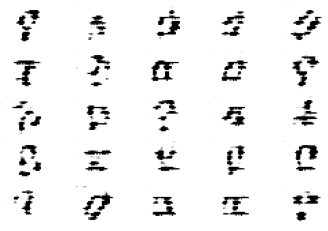

In [227]:
# generate images
latent_points = generate_latent_points(100,25)
# generate images
X = g_model.predict(latent_points)
print(X.shape)
# plot the result
save_plot(X,2,n=5)

# References

https://github.com/gtoubassi/mnist-gan

[Understand the Math and Theory of GANs](https://www.youtube.com/watch?v=J1aG12dLo4I)

[keras optimizer](https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers)

[GAN notebook](https://github.com/nttuan8/GAN_Tutorial/blob/master/G1/GAN-MNIST.ipynb)

[DCGAN notebook](https://github.com/nttuan8/GAN_Tutorial/blob/master/G2/DCGAN.ipynb)

[Bài 0: Giới thiệu series GAN (Generative Adversarial Networks)](https://nttuan8.com/gioi-thieu-series-gan-generative-adversarial-networks/)

[Bài 1: Giới thiệu về GAN](https://nttuan8.com/bai-1-gioi-thieu-ve-gan/)